<div class="alert alert-block alert-success">
  <h2>Hematology Markers EDA - Exploratory Data Analysis</h2>
</div>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette('husl')
sns.set_style('whitegrid')

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

<div class="alert alert-block alert-info">
    <h2>Data Parsing Functions</h2>
</div>

In [32]:
def extract_numeric_value(text):
    if pd.isna(text) or text == '' or text is None:
        return np.nan
    
    # Try to find the first number (integer or decimal)
    match = re.search(r'(\d+\.?\d*)', str(text))
    if match:
        return float(match.group(1))
    return np.nan

def parse_hematology_report(file_path):
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return {}
    
    data = {}
    
    # Extract Patient ID
    patient_id_match = re.search(r'Patient ID:\s*([\w-]+)', content)
    if patient_id_match:
        data['patient_id'] = patient_id_match.group(1)
    
    # Extract Age and Sex
    age_sex_match = re.search(r'Age / Sex:\s*(\d+)\s*/\s*(\w+)', content)
    if age_sex_match:
        try:
            data['age'] = int(age_sex_match.group(1))
            data['sex'] = age_sex_match.group(2)
        except (ValueError, TypeError):
            pass
    
    # Extract WBC Count
    wbc_match = re.search(r'WBC Count:\s*([\d.]+)', content)
    if wbc_match:
        try:
            data['wbc_count'] = float(wbc_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Extract Neutrophils
    neutrophils_match = re.search(r'Neutrophils:\s*([\d.]+)%', content)
    if neutrophils_match:
        try:
            data['neutrophils_pct'] = float(neutrophils_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Extract Lymphocytes
    lymphocytes_match = re.search(r'Lymphocytes:\s*([\d.]+)%', content)
    if lymphocytes_match:
        try:
            data['lymphocytes_pct'] = float(lymphocytes_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Extract Hemoglobin
    hemoglobin_match = re.search(r'Hemoglobin:\s*([\d.]+)', content)
    if hemoglobin_match:
        try:
            data['hemoglobin'] = float(hemoglobin_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Extract Platelets
    platelets_match = re.search(r'Platelets:\s*([\d.]+)', content)
    if platelets_match:
        try:
            data['platelets'] = float(platelets_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Extract CRP - Fixed regex to properly capture both formats
    crp_match = re.search(r'(?:CRP|C-reactive protein \(CRP\)):\s*([\d.]+)', content)
    if crp_match and crp_match.group(1):
        try:
            data['crp'] = float(crp_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Extract Procalcitonin
    procalcitonin_match = re.search(r'Procalcitonin:\s*([\d.]+)', content)
    if procalcitonin_match:
        try:
            data['procalcitonin'] = float(procalcitonin_match.group(1))
        except (ValueError, TypeError):
            pass
    
    # Check for Bands presence
    data['bands_present'] = 1 if 'Bands: Present' in content else 0
    
    return data

def load_all_reports(base_path):
    all_data = []
    
    # Process positive cases
    positive_path = Path(base_path) / 'positive'
    if positive_path.exists():
        for file in positive_path.glob('*.txt'):
            data = parse_hematology_report(file)
            data['pneumonia_status'] = 'Positive'
            data['file_path'] = str(file)
            all_data.append(data)
    
    # Process negative cases
    negative_path = Path(base_path) / 'negative'
    if negative_path.exists():
        for file in negative_path.glob('*.txt'):
            data = parse_hematology_report(file)
            data['pneumonia_status'] = 'Negative'
            data['file_path'] = str(file)
            all_data.append(data)
    
    df = pd.DataFrame(all_data)
    return df

<div class="alert alert-block alert-info">
    <h2>Load and Prepare Data</h2>
</div>

In [33]:
# Load all hematology reports
base_path = '../reports/heamatology_reports'
df = load_all_reports(base_path)

# Display basic info
print(f"Total records loaded: {len(df)}")
print(f"\nPneumonia Status Distribution:")
print(df['pneumonia_status'].value_counts())
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Total records loaded: 47

Pneumonia Status Distribution:
pneumonia_status
Positive    27
Negative    20
Name: count, dtype: int64

Dataset shape: (47, 13)

Columns: ['patient_id', 'age', 'sex', 'wbc_count', 'neutrophils_pct', 'platelets', 'crp', 'bands_present', 'pneumonia_status', 'file_path', 'lymphocytes_pct', 'procalcitonin', 'hemoglobin']


In [34]:
# Display first few records
print("\nFirst 5 records:")
display(df.head())

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())


First 5 records:


,patient_id,age,sex,wbc_count,neutrophils_pct,platelets,crp,bands_present,pneumonia_status,file_path,lymphocytes_pct,procalcitonin,hemoglobin
0,BLOOD-PN-017,61,Female,13.9,77.0,520.0,102.0,0,Positive,../reports/heamatology_reports/positive/patien...,NaN,NaN,NaN
1,BLOOD-PN-018,48,Male,12.5,65.0,NaN,74.0,0,Positive,../reports/heamatology_reports/positive/patien...,28.0,1.8,NaN
2,BLOOD-PN-020,56,Female,12.1,73.0,NaN,61.0,0,Positive,../reports/heamatology_reports/positive/patien...,NaN,NaN,NaN
3,BLOOD-PN-019,67,Male,19.6,87.0,NaN,156.0,0,Positive,../reports/heamatology_reports/positive/patien...,NaN,6.9,NaN
4,BLOOD-PN-015,84,Female,8.4,78.0,NaN,118.0,0,Positive,../reports/heamatology_reports/positive/patien...,NaN,4.1,NaN



Summary Statistics:


,age,wbc_count,neutrophils_pct,platelets,crp,bands_present,lymphocytes_pct,procalcitonin,hemoglobin
count,47.000000,47.000000,36.000000,19.000000,47.000000,47.000000,8.000000,10.000000,17.000000
mean,53.936170,11.357447,74.027778,331.315789,62.714894,0.255319,35.375000,4.710000,13.076471
std,14.980283,4.956276,12.988976,71.294423,57.320897,0.440755,13.783401,2.066371,1.687650
min,28.000000,3.100000,44.000000,245.000000,1.200000,0.000000,6.000000,1.800000,9.800000
25%,42.500000,7.700000,65.750000,285.000000,5.500000,0.000000,32.500000,3.425000,12.100000
50%,54.000000,10.500000,78.000000,310.000000,52.000000,0.000000,38.000000,4.100000,13.200000
75%,65.000000,15.000000,83.250000,355.000000,111.000000,0.500000,44.000000,5.925000,13.900000
max,84.000000,21.500000,90.000000,520.000000,170.000000,1.000000,49.000000,8.700000,16.900000


In [35]:
# Check for missing values
print("Missing Values Analysis:")
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
display(missing_df)

Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage
lymphocytes_pct,lymphocytes_pct,39,82.98
procalcitonin,procalcitonin,37,78.72
hemoglobin,hemoglobin,30,63.83
platelets,platelets,28,59.57
neutrophils_pct,neutrophils_pct,11,23.40


## 3. Exploratory Data Analysis - Visualizations

### 3.1 Distribution of Key Markers by Pneumonia Status

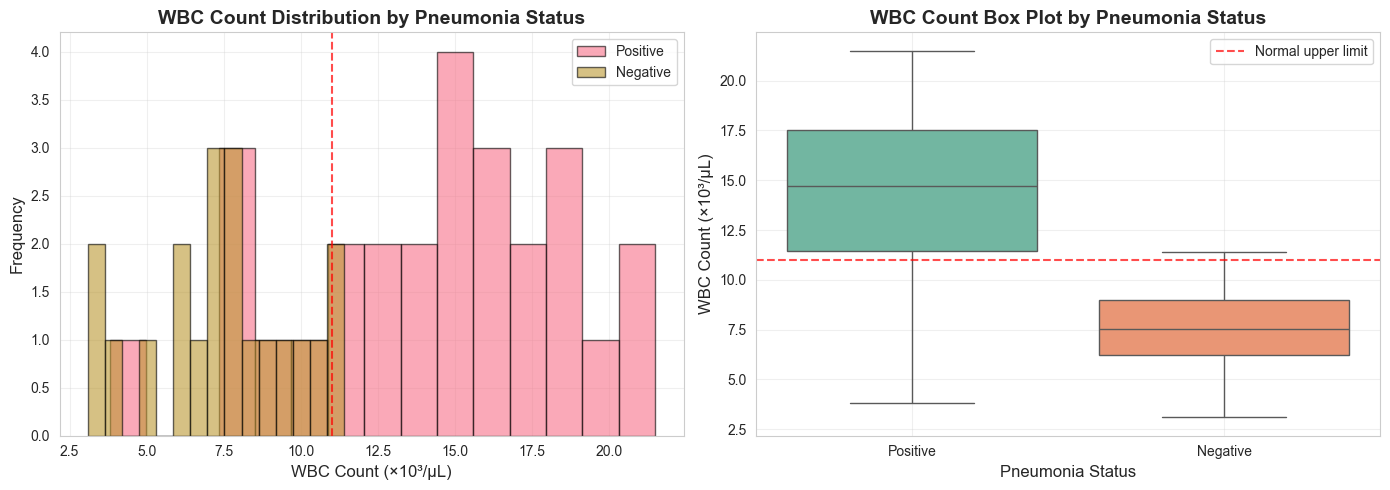


WBC Count Statistics by Pneumonia Status:
                  count       mean       std  min    25%    50%     75%   max
pneumonia_status                                                             
Negative           20.0   7.470000  2.342760  3.1   6.25   7.55   8.975  11.4
Positive           27.0  14.237037  4.383373  3.8  11.45  14.70  17.500  21.5


In [36]:
# WBC Count Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
for status in df['pneumonia_status'].unique():
    subset = df[df['pneumonia_status'] == status]['wbc_count'].dropna()
    axes[0].hist(subset, alpha=0.6, label=status, bins=15, edgecolor='black')
axes[0].set_xlabel('WBC Count (×10³/µL)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('WBC Count Distribution by Pneumonia Status', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].axvline(x=11, color='red', linestyle='--', alpha=0.7, label='Normal upper limit')
axes[0].grid(alpha=0.3)

# Box plot
sns.boxplot(data=df, x='pneumonia_status', y='wbc_count', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Pneumonia Status', fontsize=12)
axes[1].set_ylabel('WBC Count (×10³/µL)', fontsize=12)
axes[1].set_title('WBC Count Box Plot by Pneumonia Status', fontsize=14, fontweight='bold')
axes[1].axhline(y=11, color='red', linestyle='--', alpha=0.7, label='Normal upper limit')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\nWBC Count Statistics by Pneumonia Status:")
print(df.groupby('pneumonia_status')['wbc_count'].describe())

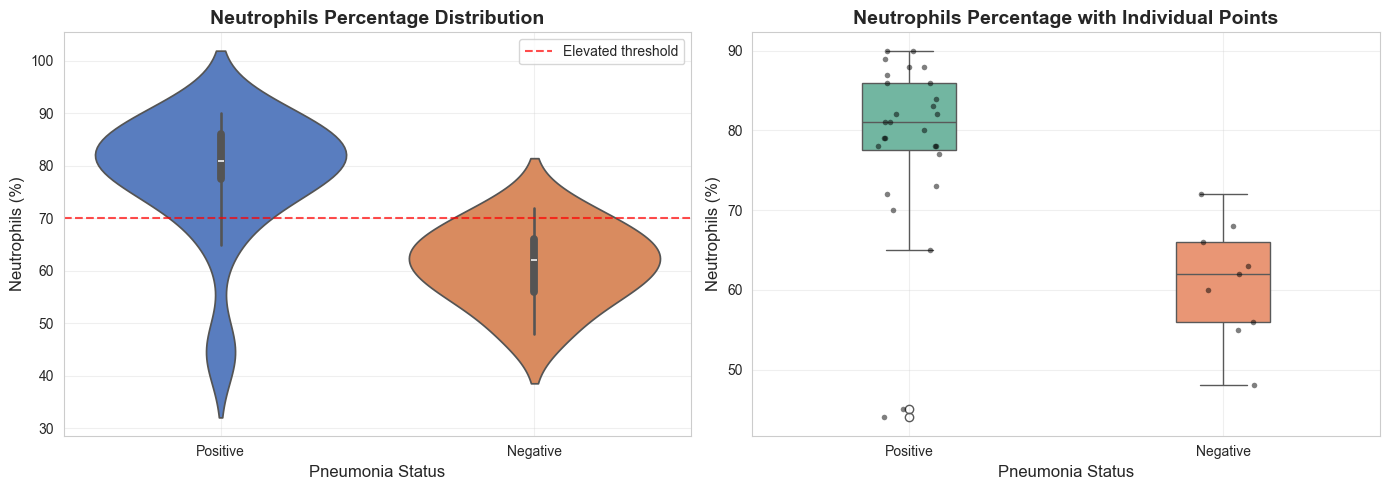


Neutrophils Statistics by Pneumonia Status:
                  count       mean        std   min   25%   50%   75%   max
pneumonia_status                                                           
Negative            9.0  61.111111   7.339013  48.0  56.0  62.0  66.0  72.0
Positive           27.0  78.333333  11.555884  44.0  77.5  81.0  86.0  90.0


In [37]:
# Neutrophils Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot
sns.violinplot(data=df, x='pneumonia_status', y='neutrophils_pct', ax=axes[0], palette='muted')
axes[0].set_xlabel('Pneumonia Status', fontsize=12)
axes[0].set_ylabel('Neutrophils (%)', fontsize=12)
axes[0].set_title('Neutrophils Percentage Distribution', fontsize=14, fontweight='bold')
axes[0].axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Elevated threshold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Strip plot with box overlay
sns.boxplot(data=df, x='pneumonia_status', y='neutrophils_pct', ax=axes[1], palette='Set2', width=0.3)
sns.stripplot(data=df, x='pneumonia_status', y='neutrophils_pct', ax=axes[1], 
              color='black', alpha=0.5, size=4, jitter=True)
axes[1].set_xlabel('Pneumonia Status', fontsize=12)
axes[1].set_ylabel('Neutrophils (%)', fontsize=12)
axes[1].set_title('Neutrophils Percentage with Individual Points', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNeutrophils Statistics by Pneumonia Status:")
print(df.groupby('pneumonia_status')['neutrophils_pct'].describe())

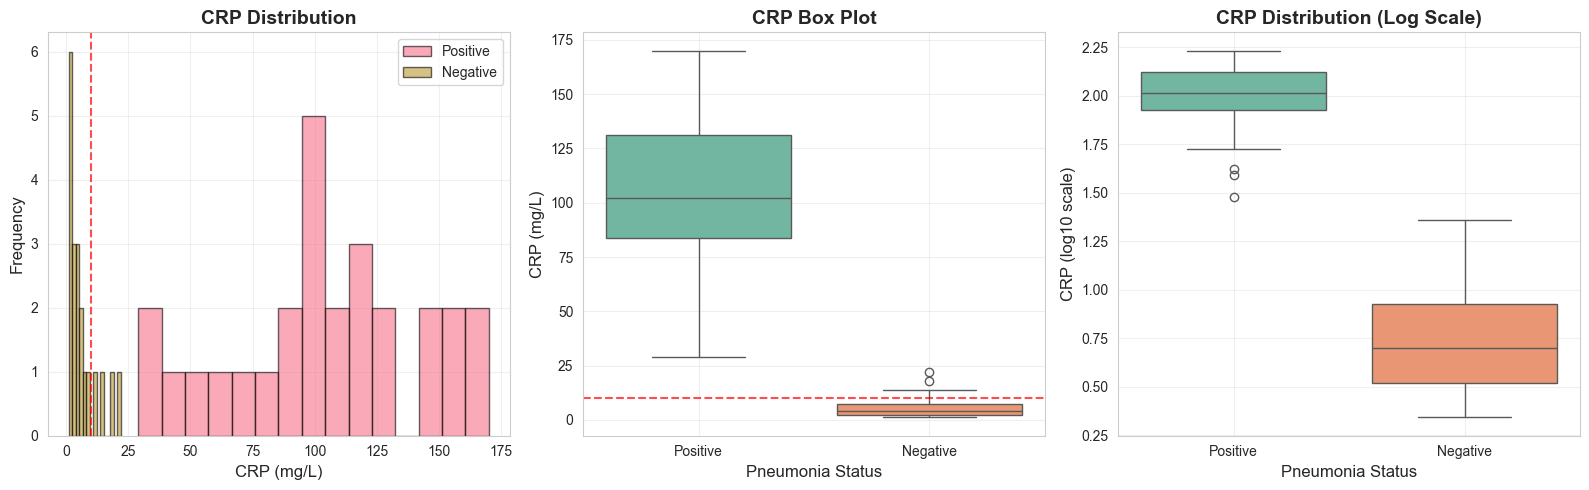


CRP Statistics by Pneumonia Status:
                  count        mean        std   min   25%    50%    75%  \
pneumonia_status                                                           
Negative           20.0    6.280000   5.809122   1.2   2.3    4.0    7.5   
Positive           27.0  104.518519  39.035852  29.0  84.0  102.0  131.0   

                    max  
pneumonia_status         
Negative           22.0  
Positive          170.0  


In [38]:
# CRP (C-Reactive Protein) Distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
for status in df['pneumonia_status'].unique():
    subset = df[df['pneumonia_status'] == status]['crp'].dropna()
    axes[0].hist(subset, alpha=0.6, label=status, bins=15, edgecolor='black')
axes[0].set_xlabel('CRP (mg/L)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('CRP Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].axvline(x=10, color='red', linestyle='--', alpha=0.7, label='Normal upper limit')
axes[0].grid(alpha=0.3)

# Box plot
sns.boxplot(data=df, x='pneumonia_status', y='crp', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Pneumonia Status', fontsize=12)
axes[1].set_ylabel('CRP (mg/L)', fontsize=12)
axes[1].set_title('CRP Box Plot', fontsize=14, fontweight='bold')
axes[1].axhline(y=10, color='red', linestyle='--', alpha=0.7)
axes[1].grid(alpha=0.3)

# Log scale for better visualization
df_crp = df.dropna(subset=['crp'])
df_crp['crp_log'] = np.log10(df_crp['crp'] + 1)
sns.boxplot(data=df_crp, x='pneumonia_status', y='crp_log', ax=axes[2], palette='Set2')
axes[2].set_xlabel('Pneumonia Status', fontsize=12)
axes[2].set_ylabel('CRP (log10 scale)', fontsize=12)
axes[2].set_title('CRP Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCRP Statistics by Pneumonia Status:")
print(df.groupby('pneumonia_status')['crp'].describe())

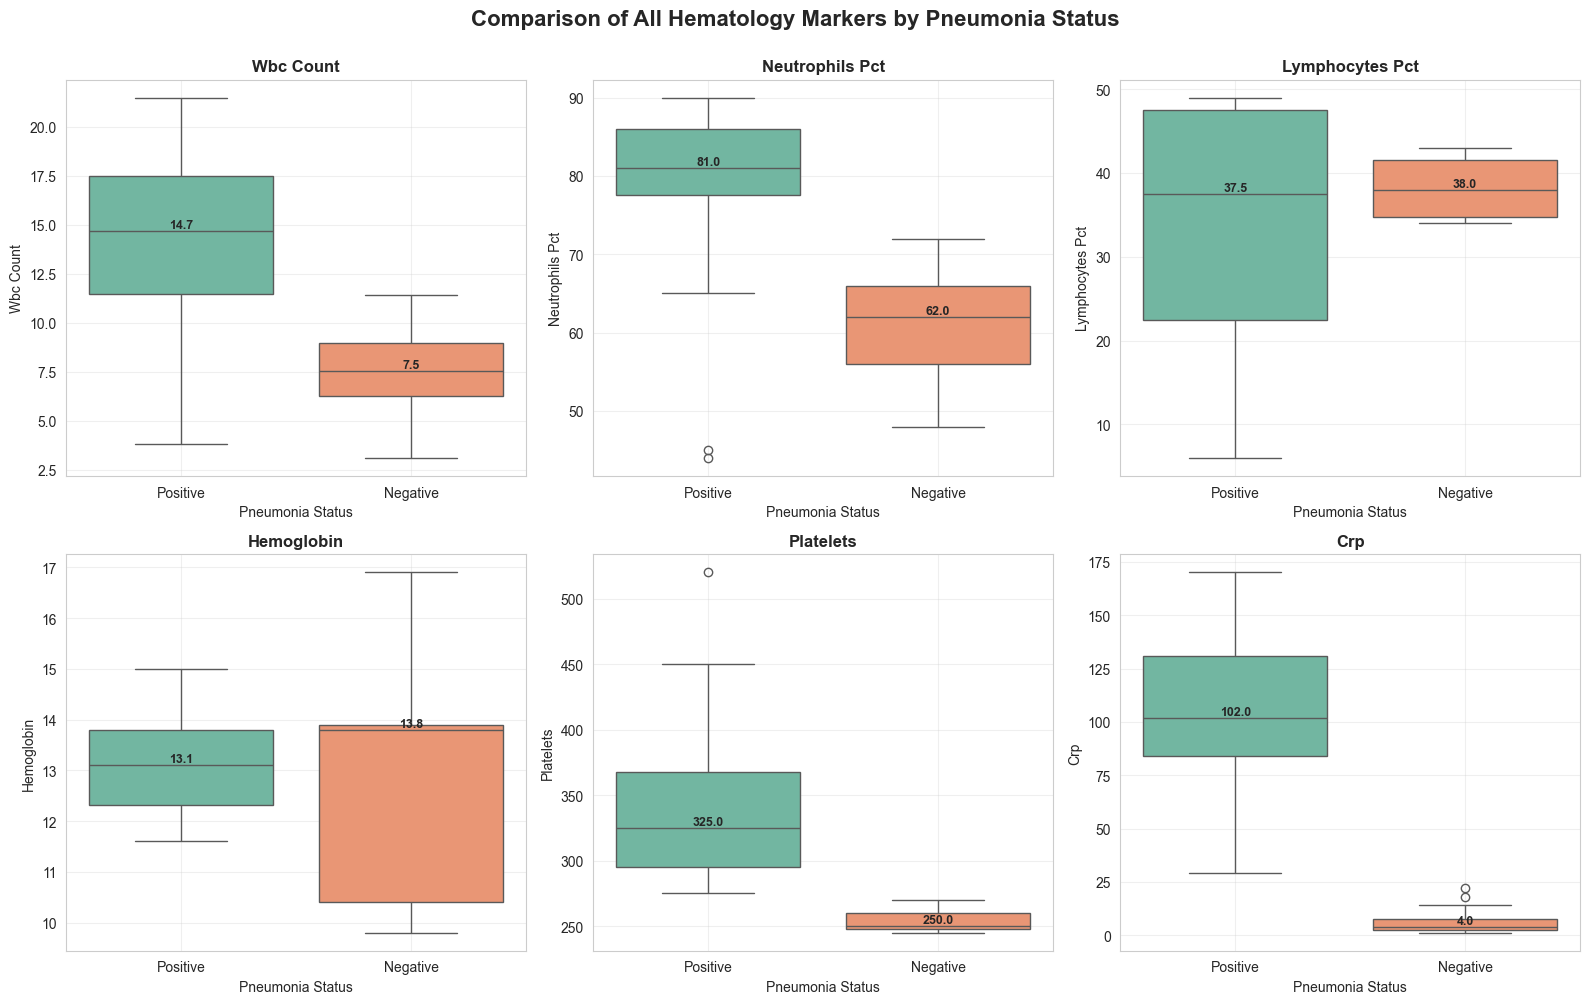

In [39]:
# Comprehensive comparison of all markers
markers = ['wbc_count', 'neutrophils_pct', 'lymphocytes_pct', 'hemoglobin', 'platelets', 'crp']
available_markers = [m for m in markers if m in df.columns and df[m].notna().sum() > 0]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, marker in enumerate(available_markers):
    sns.boxplot(data=df, x='pneumonia_status', y=marker, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{marker.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Pneumonia Status', fontsize=10)
    axes[idx].set_ylabel(marker.replace('_', ' ').title(), fontsize=10)
    axes[idx].grid(alpha=0.3)
    
    # Add median values as text
    medians = df.groupby('pneumonia_status')[marker].median()
    for i, status in enumerate(df['pneumonia_status'].unique()):
        if status in medians.index:
            axes[idx].text(i, medians[status], f'{medians[status]:.1f}', 
                          ha='center', va='bottom', fontweight='bold', fontsize=9)

# Hide extra subplots
for idx in range(len(available_markers), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Comparison of All Hematology Markers by Pneumonia Status', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()